Напишите код, который находит неотрицательную частоту с максимальным спектральным весом для функции $f(t)=sin(v\cos(2\pi t))$ для заданного $v\in [1, 10]$

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

In [11]:
v = float(input())
tmax = 4
dt = 0.01
t = np.arange(0, tmax, dt) # временная сетка
def func(t):
    return np.sin(v*np.cos(2*np.pi*t))

signal = func(t) # применили функцию к сетке
fft_signal = np.fft.fft(signal) # fft, примененное к сигналу
fft_freqs = np.fft.fftfreq(t.size, dt) # теперь получим сами частоты, для которых наш новых сигнал определен

In [12]:
# Нахождение неотрицательной частоты с максимальным спектральным весом
positive_freqs = fft_freqs[:t.size//2]  # Только положительные частоты
positive_fft = np.abs(fft_signal[:t.size//2])  # Амплитуды для положительных частот

max_freq_index = np.argmax(positive_fft)  # Индекс максимальной амплитуды
max_freq = positive_freqs[max_freq_index]  # Неотрицательная частота с максимальной амплитудой
max_freq

5.0

Имеется функция, зависящая от двух частот $f(f_x, f_y) = rect (\frac{f_x}{2W})rect(\frac{f_y}{2W})$, где
$$rect(x) = \begin{cases}1, |x| < 1/2 \\0, |x| > 1/2 \\1/2, |x| = 1/2 \end{cases}$$
Обратное преобразование Фурье от нее при $W = 0.25$ есть функция с максимумом в x, y = (0, 0).

Написать код, который определяет положение максимума обратного преобразования Фурье функции $f(f_x, f_y) = rect (\frac{f_x}{2W})rect(\frac{f_y}{2W})e^{i2\pi a f_x} e^{i2\pi b f_y}$ c $W = 0.25$ для заданных a, b.

In [170]:
a, b = map(float, input().split())

W = 0.25

In [171]:
def rect(x):
    if np.abs(x) < 0.5:
        return 1
    elif np.abs(x) > 0.5:
        return 0
    else:
        return 0.5
    
def f(fx, fy):
    rec = np.vectorize(rect)
    ret = np.tensordot(rec(fx/(2*W)), rec(fy/(2*W)), axes=0)
    print("first func shape: ", ret.shape)
    return ret

def f2(fx, fy):
    exps = np.exp(1j*2*np.pi * a * fx)* np.exp(1j*2*np.pi * b * fy)
    print("exps shape: ", exps.shape)
    ret = f(fx, fy)* exps
    print(ret.shape)
    return ret

first func shape:  (200, 200)


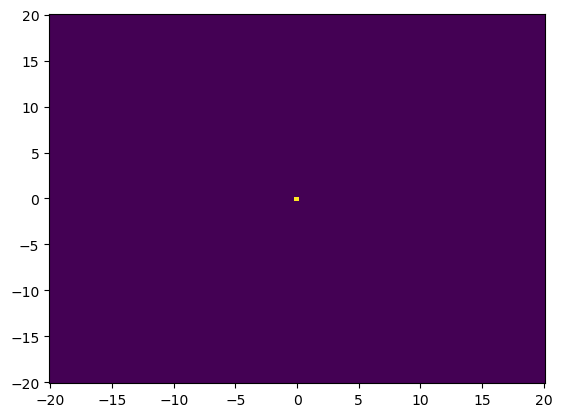

In [179]:
grid = 200
x, y = np.linspace(-20, 20, grid),np.linspace(-20, 20, grid)

X,Y = np.meshgrid(x,y)
I_prev = f(x, y)
plt.pcolor(X, Y, I_prev)
plt.show()

In [180]:
ifft_signal = np.fft.ifft2(I_prev)  # Обратное преобразование Фурье

# Нахождение позиции максимума в обратном преобразовании
max_position = np.unravel_index(np.argmax(np.abs(ifft_signal)), ifft_signal.shape)
print(max_position[0], max_position[1])

0 0


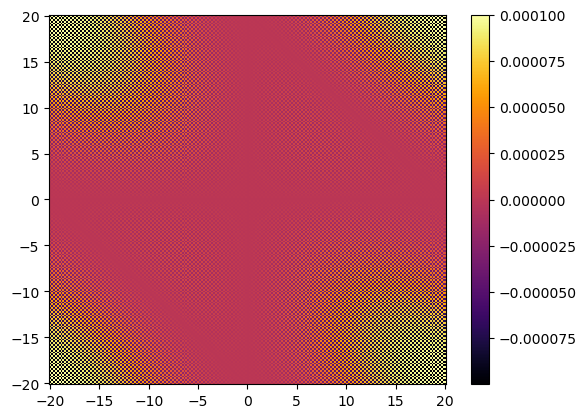

In [181]:
plt.pcolor(X, Y, ifft_signal.real, cmap = 'inferno')
plt.colorbar()
plt.show()

In [182]:
I = f2(x, y)
I.shape

exps shape:  (200,)
first func shape:  (200, 200)
(200, 200)


(200, 200)

In [183]:
ifft_signal = np.fft.ifft2(I)  # Обратное преобразование Фурье

# Нахождение позиции максимума в обратном преобразовании
max_position = np.unravel_index(np.argmax(np.abs(ifft_signal)), ifft_signal.shape)
# print(max_position[0], max_position[1])
np.unravel_index(np.argmax(np.abs(ifft_signal)), ifft_signal.shape)

(0, 160)

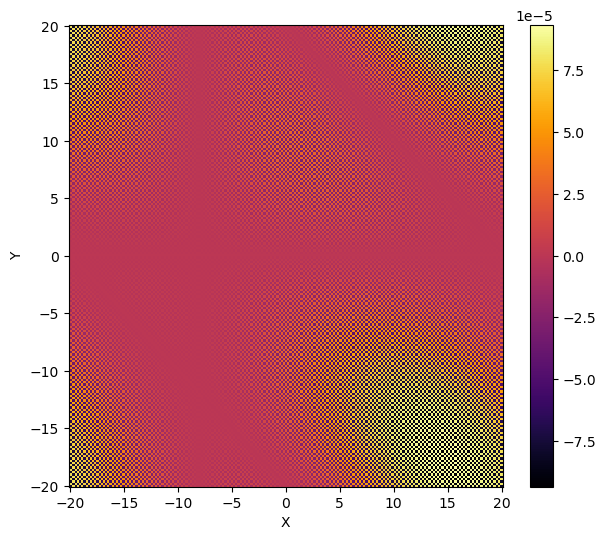

In [184]:
plt.figure(figsize = (7,6))
plt.pcolor(X, Y, ifft_signal.real, cmap = 'inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

Создатели курса - нехорошие люди.

При умножении на $e^{i2\pi a f_x} e^{i2\pi b f_y}$ происходит сдвиг максимума на вектор $(-a, -b)$